# CALCULO INTEGRAL E DIFERENCIAL

Esta capítulo aborda as funções básicas do cálculo diferencial e integral, como limites, derivadas e integrais de forma simbólica e numérica. Serão utilizado os pacotes a seguir:

* **SymPy.jl**

O pacote `SymPy.jl` é uma biblioteca `Python` para matemática simbólica utilizado na linguagem `Julia` via pacote `PyCall.jl`. Para instalar o pacote use:
```julia
using Pkg
Pkg.add("SymPy")

```
* **HCubature.jl**

O pacote `HCubature` é uma implementação dos a de integração multidimensional "h-adaptativa" totalmente escrita em Julia. O algoritmo de `hquadrature` é baseado no algoritmo descrito no trabalho de A. C. Genz and A. A. Malik, "An adaptive algorithm for numeric integration over an N-dimensional rectangular region". Doi: https://doi.org/10.1016/0771-050X(80)90039-X . Isto é, dada uma integral n-dimensional. O `HCubature.jl` foi escrito por Steven G. Johnson e é um software livre e de código aberto sob a licença MIT. Para instalar o pacote use:
```julia
using Pkg
Pkg.add("Cubature")

```
* **QuadGK.jl**

Este pacote fornece suporte para integração numérica unidimensional usando a quadratura adaptável de Gauss-Kronrod. O pacote oferece três funções: `quadgk()`, `gauss()` e `kronrod()`. Para instalar o pacote use:
```julia
using Pkg
Pkg.add("QuadGK")

```

* **Polynomials.jl**

É um pacote exclusivo para manipulação de polinômios. Permite operações de aritmética básica, integração, diferenciação, avaliação e determinação de raizes em polinômios. Para instalar o pacote use:
```julia
using Pkg
Pkg.add("Polynomials")

```

* **Calculus.jl**

O pacote ```Calculus.jl``` fornece ferramentas para trabalhar com as operações básicas de cálculo de diferenciação e integração. Você pode usar o pacote ```Calculus.jl``` para produzir derivadas aproximadas por várias formas de diferenciação finita ou para produzir uma derivada exata usando diferenciação simbólica. Você também pode computar integrais definidas por diferentes métodos numéricos. Para instalar o pacote use:
```julia
using Pkg
Pkg.add("Calculus")

```

## LIMITES

De acordo com a definição, Downing (2009) descreve que:
>O limite de uma função é o valor que a variável dependente se aproxima à medida que a variável independente se 
>aproxima de algum valor fixo. A expressão algébrica algébrica “O limite
> de f (x) quando x se aproxima de a ” é escrito como:
>
> $$~\displaystyle \lim_{x\rightarrow a}{f(x)} = L ~$$

### LIMITE SIMBÓLICO

O pacote `SymPy.jl` possui a função `limit()` que pode calcular limites simbólicos de acordo com a sintaxe: 
```julia
limit(f(x), var, constante, "+" / "-")
```
Sendo:
* **f(x)**: função matemática $f(x)$ expressa como uma expressão algébrica simbólica ou uma função genérica;
* **var**: variável de $f(x)$;
* **constante**: valor da constante; 
* **"+" / "-"**: limite direita ("+") ou esquerda ("-").

Exemplo: Calcular o limite $ \displaystyle \lim_{x\rightarrow 1}{(x - 1)^2\over{(x - 1)} }$

In [1]:
using SymPy
@syms x y

(x, y)

In [2]:
limit((x-1)^2 / (x-1), x, 1) 

0

Ou ainda

In [3]:
f1(x) = (x-1)^2 / (x - 1)

f1 (generic function with 1 method)

In [4]:
limit(f1(x), x, 1)

0

#### LIMITE DE FUNÇÕES MATEMÁTICAS DE VÁRIAS VARIÁVEIS

Exemplo: Calcular o limite: $ \displaystyle \lim_{x\rightarrow 1, y\rightarrow 1}{xy - 2x + y }$

In [136]:
f2(x, y) = x*y - 2*x + y

f2 (generic function with 1 method)

In [1]:
limit(limit(f2(x,y), x, 1), y, 1)

UndefVarError: UndefVarError: f2 not defined

#### LIMITE SIMBÓLICO INFINITO

$ \displaystyle \lim_{x\rightarrow \infty}{1 \over x^2 }$ e $ \displaystyle \lim_{x\rightarrow - \infty}{1 \over x^2 }$ 

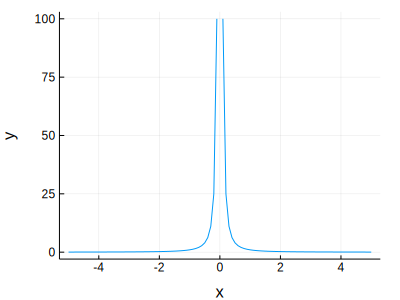

In [162]:
plot(-5:0.1:5, x->1/x^2, xlabel = "x", ylabel="y", size=(400, 300), label ="")

In [157]:
limit(1/x^2, x, oo)

1

In [167]:
limit(1/x^2, x, -oo)

0

#### LIMITES LATERAIS

$ \displaystyle \lim_{x\rightarrow 0}{x \over |x| }$

In [164]:
# limite à direita 
limit(x/abs(x), x, 0, "+")

1

In [166]:
# limite à esquerda
limit(x/abs(x), x, 0, "-")

-1

### LIMITE NUMÉRICO

O pacote `Base` da linguagem `Julia` ou o pacote `SymPy.jl` não oferecem uma função para calcular o limite numérico, logo é possível utilizar a definição de limite $~\displaystyle \lim_{x\rightarrow a}{f(x)} = L ~$,  de tal forma que $x$ seja o mais próxima da constante $a$.

Calcular o limite:  $\displaystyle \lim_{x\rightarrow 0}{\frac{(x - 1)^2} {(x + 1)} }$

In [2]:
f3(x) = (x - 1)^2/(x + 1)

f3 (generic function with 1 method)

In [3]:
# limite à direita 
f3(1e-15)

0.9999999999999969

In [4]:
# limite à esquerda 
f3(-1e-15)

1.0000000000000033

** Forma visual do $\displaystyle \lim_{x\rightarrow a}{f(x)} = L $ utilizando List Comprehension**

In [5]:
xln = [10.0^-i for i in 0:10]

yln = [f3(i)  for i in xln]

[xln yln]

11×2 Array{Float64,2}:
 1.0      0.0     
 0.1      0.736364
 0.01     0.970396
 0.001    0.997004
 0.0001   0.9997  
 1.0e-5   0.99997 
 1.0e-6   0.999997
 1.0e-7   1.0     
 1.0e-8   1.0     
 1.0e-9   1.0     
 1.0e-10  1.0     

## DERIVADA

De acordo com Downing (2009) a definição de derivada é:  
> The derivative of a function is the rate of change of that function. On the graph of the curve y f(x), the derivative at x is equal to the slope of the tangent line at the point (x, f(x)). 

### DERIVADA SIMBÓLICA INDEFINIDA

```julia
diff(f(x), var, ordem_derivada)

```
Sendo:
* **f(x)**: função matemática $f(x)$ expressa como uma expressão algébrica simbólica ou uma função genérica;
* **var**:variável de $f(x)$;
* **ordem_derivada**: 

Exemplo: dada a função $f(x) = x^2 + 3x$, calcular $ \displaystyle {f'(x)} $

In [2]:
using SymPy
@syms x

(x,)

In [3]:
f4(x) = x^2 + 3*x

f4 (generic function with 1 method)

In [4]:
# Derivada primeira

diff(f4(x), x, 1)

2⋅x + 3

forma alternativa

In [5]:
der1 =  Derivative(f4(x), x, 1)

d ⎛ 2      ⎞
──⎝x  + 3⋅x⎠
dx          

In [48]:
doit(der1)

2*x + 3

In [49]:
# Derivada segunda

diff(f4(x), x, 2)

2

Forma alternativa

In [50]:
der2 = Derivative(f4(x), x, 2)

  2          
 d / 2      \
---\x  + 3*x/
  2          
dx           

In [51]:
doit(der2)

2

In [52]:
# Derivada terceira
diff(f4(x), x, 3)

0

### DERIVADA SIMBÓLICA DEFINIDA 

Sintaxe:
```julia
diff(f(x), var, ordem_derivada)(valor_var)
```
Sendo:
* **f(x)**: função matemática $f(x)$ expressa como uma expressão algébrica simbólica ou uma função genérica ou anônima;
* **var**: variável de $f(x)$;
* **ordem_derivada**: 
* **valor_var**: valor numérico ou simbólico da variável de $f(x)$;

Exemplo: dada a função $f(x) = x^2 + 3x$, calcular $ \displaystyle {d'(0)} $

In [96]:
using SymPy 
@syms x 

(x,)

In [281]:
f5(x) = x^3 + 3*x + 1

f5 (generic function with 1 method)

In [282]:
# Derivada segunda x = 0
diff(f5(x), x, 1)(0)

3

In [283]:
# Derivada segunda x = 0
diff(f5(x), x, 2)(0)

0

**Lançamento vertical**

Uma esfera de 200g de massa é lançado para cima com velocidade de 20m/s. 
![](Figuras/objeto-1.jpg)

A função que descrevem o espaço em função do tempo é definido por:

$\displaystyle{s(t) = s_0 + v_0t + \frac {at^2}{2}}$

$\displaystyle{s(t) = 20t - 9.8\frac{t^2}{2}}$

In [6]:
using SymPy
@syms t

┌ Info: Recompiling stale cache file /home/jmarcellopereira/.julia/compiled/v1.0/SymPy/KzewI.ji for SymPy [24249f21-da20-56a4-8eb1-6a02cf4ae2e6]
└ @ Base loading.jl:1190


(t,)

In [9]:
s(t) = 20*t - 9.8*t^2/2

s (generic function with 1 method)

Tempo. Para determinar o tempo de lançamento, devemos calcular $s(t) = 0.$

In [10]:
t1, t2 = float(solve(s(t), t))

2-element Array{Float64,1}:
 0.0              
 4.081632653061225

Gráfico do espaço.

┌ Info: Recompiling stale cache file /home/jmarcellopereira/.julia/compiled/v1.0/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1190


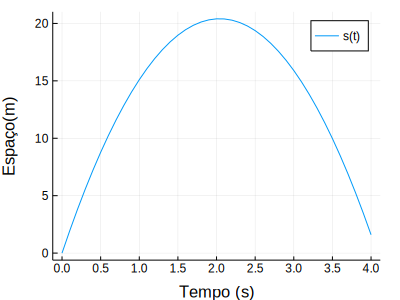

In [11]:
using Plots
gr()

plot(t1:0.1:t2, s, 
    label = "s(t)",
    xticks = t1:0.5:t2, 
    xlabel = "Tempo (s)",
    ylabel = "Espaço(m)",
    size = (400, 300))

Velocidade. A função $v(t)$ é a derivada da função $s(t)$.

In [12]:
v = diff(s(t), t)

-9.8⋅t + 20

O resultado de $s'(t)$ é simbólico e embora seja possível manipular $v$ na forma $v(tempo)$, o resultado também será sempre simbólico, logo, é interessante transformá-lo em função genérica:

In [13]:
@eval V(t) = $(Meta.parse(string(v)))

V (generic function with 1 method)

Gráfico $V(t)$. Observe que `ytricks` varia de $~V(t2)~$ a $~V(t1)~$, isto se deve ao fato de que $~V(t2)~<~V(t1)~$. A função `round()` é utilizada para limitar a quantidade de casas decimais no cálculo de $~V(t)$.

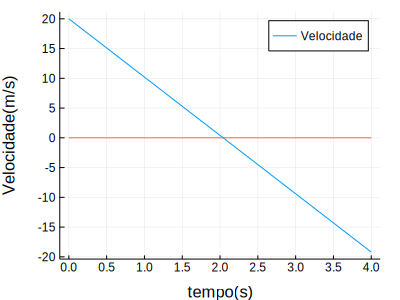

In [14]:
# Gráfico da variação da velocidade
plot(t1:0.1:t2, V, 
    xticks = t1:0.5:t2, 
    yticks = round.(V(t2): 5: V(t1)),
    label = "Velocidade",    
    xlabel = "tempo(s)",
    ylabel = "Velocidade(m/s)", 
    size = (400, 300))
plot!(t1:0.1:t2, zero, label = "")

Altura máxima. Para encontrarmos a altura máxima devemos resolver $s'(t) = 0$ para determinar o tempo em segundos.

In [15]:
t_h_max = float(solve(diff(s(t), t))[])

2.0408163265306123

In [16]:
#Cálculo da altura máxima (m)
s(t_h_max)

20.40816326530612

\* Uma outra forma é calcular pela formula de Torricelli, $v^2 = v^2_0-2a\Delta{t}$, sendo $v =0$:

In [21]:
@syms ds
solve(20^2 -2*9.8*ds, ds)

1-element Array{Sym,1}:
 20.4081632653061

### DERIVADA NUMÉRICA

`Julia` não implementa uma função nativa para derivadas numéricas. A saída é aplicar a definição de derivada de uma função matemática na forma $\displaystyle f'(x_0) = \lim_{h\rightarrow 0}{ f(x_0 + h) - f(x_0)  \over h}  ~~$ (desde que o limite exista) ou usar o pacote a função `derivative()` do pacote `Calculus.jl`.




Exemplo: Calcular a derivada primeira numérica de $f(x) = x^3 + 5x^2 - 3$ para x = 1.0

In [62]:
f6(x) = x^3 + 5.0*x^2 - 3.0

df6(x0, h) = (f6(x0 + h) - f6(x0))/h

df6 (generic function with 1 method)

In [63]:
df6(1.0, 1e-6)

13.000007999863783

In [64]:
using Calculus

In [65]:
derivative(f6, 1.0)

12.999999999939515

In [67]:
# forma alternativa
f6'(1.0)

12.999999999939515

**Derivada Segunda Numérica**

Exemplo: Calcular a derivada segunda numérica de $f(x) = x^3 + 5x^2 - 3$ para x = 1.0

In [22]:
f6(x) = x^3 + 5.0*x^2 - 3.0

f6 (generic function with 1 method)

In [23]:
second_derivative(f6, 1.0)

15.999985668849135

In [24]:
# forma alternativa
f6''(1.0)

15.999985668849135

### DERIVADA PARCIAL

De acordo com Downing (2009) a definição de derivada parcial é:
> The partial derivative of y = f(x1 , x2, . . ., xn) with respect to xi is found by taking the derivative of y with respect to x i, while all the other independent variables are held constant.

$\displaystyle \frac{\partial{f}}{\partial{x}}(x_0, y_0)~~$ é a derivada, em relação a $x$, de $f(x, y)$, mantendo-se $y$ constante e  $~~\displaystyle \frac{\partial{f}}{\partial{y}}(x_0, y_0)~~$  é a derivada, em relação a $y$, de $f(x, y)$, mantendo-se $x$ constante. 
Numericamente, as derivadas parciais são calculadas a partir da sua definição na forma:

$\displaystyle \frac{\partial{f}}{\partial{x}}(x_0, y_0) = \lim_{ \Delta x \rightarrow 0}{ f(x_0 + \Delta x, y_0) - f(x_0, y_0)  \over  \Delta x} ~~~~$ e $~~~~ \displaystyle \frac{\partial{f}}{\partial{y}}(x_0, y_0) = \lim_{ \Delta y \rightarrow 0}{ f(x_0, y_0 + \Delta y) - f(x_0, y_0)  \over  \Delta y} $

Exemplo: Calcular a derivada parcial simbólica de $f(x, y) =  xy + x^2 - 2y$ 

In [30]:
using SymPy
@syms x y

(x, y)

In [31]:
f7(x, y) =  x*y + x^2 - 2*y

f7 (generic function with 1 method)

In [32]:
# Derivada Primeira parcial em relação a variável x
diff(f7(x, y), x, 1)

2⋅x + y

In [33]:
# Derivada Primeira parcial em relação a variável x definida para x = 0 e y = 1
diff(f7(x, y), x, 1)(0, 1) 

1

In [34]:
# Derivada Primeira parcial em relação a variável y
diff(f7(x, y), y, 1)

x - 2

In [35]:
# # Derivada Primeira parcial em relação a variável y definida para x = 0 e y = 1
diff(f7(x, y), y, 1)(0, 1)

-2

**Atribuíndo a derivada a uma variável**

Quando atribuímos o resultado da função `diff()` a uma variável (`var = diff(f(x,y), x, 1)`), é possível realizar `var(valor_x, valor_y)` e obter um resultado,  porém não há certeza se os valores atribídos para $ x $  e $ y $ serão aplicados na ordem correta. Dessa forma a função `subs()` do pacote `SymPy.jl` resolve este problema.

In [36]:
# Derivada Primeira parcial em relação a variável x
Dx = diff(f7(x, y), x, 1)

2⋅x + y

In [37]:
# Testando para x = 0 e y = 1
subs(Dx, x=>0, y=>1)

1

In [38]:
# Derivada Primeira parcial em relação a variável y
Dy = diff(f7(x, y), y, 1) 

x - 2

In [39]:
# Testando para x = 0 e y = 1
subs(Dy, x=>0, y=>1)

-2

### POLINÔMIOS

Dado um polinômio definido como $p(x)= a_nx^n + a_{n−1}x^{n−1} + ... +   a_2x^2 + a_1x + a_0$, o pacote `Polinomials.jl` possui a função `polyder()` que calcula a derivada termo por termo. É importante observar que o `SymPy.jl` também importa as funções de manipulação de polinômos `Poly()`, `coeffs()`, `poly()` e `degree()`. Dessa forma, é necessário a sintaxe `Polynomials.função()` quando utilizamos juntos os pacote `Polinomials.jl` e `SymPy.jl`. A função `polyder()` retorna resultado do tipo `Polynomials.Poly{Int64}` manipulável semelhante a uma expressão algébrica simbólia criada pelo `SymPy.jl`. Sintaxe:

```julia
polyder(Polynomials.Poly([a_0, a_1, a_2 ... , a_n])
```
Sendo:
* **[a_0, a_1, a_2 ... , a_n]**: vetor dos termos do polinômio.


Exemplo: Calcular a derivada de $p(x) = 3x^2 + 2x + 1$

In [1]:
using Polynomials

In [2]:
dp = polyder(Polynomials.Poly([1, 2, 3]))

Poly(2 + 6*x)

In [3]:
typeof(dp)

Poly{Int64}

In [4]:
# substituindo x por 0
dp(0)

2

In [5]:
# aplicando um vetor à derivada 
dp.([1, 2, 3])

3-element Array{Int64,1}:
  8
 14
 20

Para atribuir o resultado da função `polyder()` à uma função genérica use:
```julia
@eval função_nome(x) = $(Meta.parse(string(polyder(Polynomials.Poly([a_0, a_1, a_2 ... , a_n])))))
```

In [6]:
@eval dfp(x) = $(Meta.parse(string(polyder(Polynomials.Poly([1, 2, 3])))))

dfp (generic function with 1 method)

In [10]:
dfp(0)

Poly(2)

### APLICAÇÕES DAS DERIVADAS: MÁXIMOS E MÍNIMOS DE FUNÇÕES

De acordo com Stewart(2010) as condições básicas para determinar um ponto de máximo ou mínimo local é:
>Suponha que $~f''$ seja contínua na proximidade de $c$.

>(a) Se $f'(c)=0~$  e $~f''(c)>0$, então $f$ tem um mínimo local em c.

>(b) Se $f'(c)=0~$  e $~f''(c)<0$, então $f$ tem um máximo local em c.

O Teste da derivada degunda é falha quando $f''=0$, ou seja, esse ponto pode ser um máximo, um mínimo ou nenhum dos dois.

Exemplo: $f(x) = x^3 - x^2 - x + 5$ 

In [10]:
using SymPy
@syms x

(x,)

In [11]:
f7(x) = x^3 - x^2 - x + 5

f7 (generic function with 1 method)

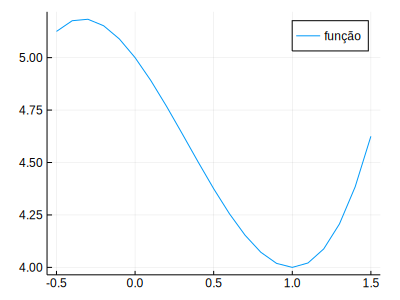

In [12]:
using Plots
gr()

plot(-0.5:0.1:1.5, f7, size = (400, 300), label = "função")

**Pontos críticos**

Para encontar um ponto crítico, $P(x_{crítico}, y_{crítico})$, devemos:
1. calcular as raízes que determinam os números críticos $x_c$ de $f'(x) = 0$.
2. aplicar o teste da derivada segunda para $~x_c~$, ou seja $~f''(x_c)~$

In [13]:
#números críticos da abscissa
xc =  solve(diff(f7(x), x) , x)

2-element Array{Sym,1}:
 -1/3
    1

In [14]:
#Pontos críticos
P = [(i, f7(i)) for i = float(xc)]

2-element Array{Tuple{Float64,Float64},1}:
 (-0.3333333333333333, 5.185185185185185)
 (1.0, 4.0)                              

Agora sabemos que os pontos $~P_1(-0.3333333333333333, ~5.185185185185185)~$ e $~P_2(1.0, ~4.0)$ são os pontos críticos da função $f(x) = x^3 - x^2 - x + 5$. Devemos agora determinar se são pontos de máximo local ou mínimo local aplicando o teste da derivada segunda e observar que para um número crítico $c$ temos:

 $f''(c) < 0$ : máximo local ; $~~f''(c) > 0$ : mínimo local


In [17]:
for i = xc    
    if diff(f7(x), x, 2)(i) < 0
        global max_local = (i, float(f7(i)))
    else
        global min_local = (i, float(f7(i)))
    end
end

In [18]:
max_local, min_local

((-1/3, 5.185185185185185), (1, 4.0))

Outra forma utilizando list comprehension

In [19]:
[float(diff(f7(x), x, 2)(i))< 0 ? max_local=(i, float(f7(i))) : min_local=(i, float(f7(i))) for i = xc]

2-element Array{Tuple{Sym,Float64},1}:
 (-1/3, 5.185185185185185)
 (1, 4.0)                 

**Gráfico**

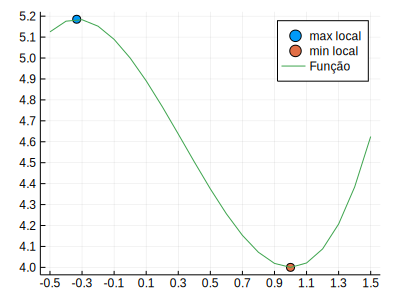

In [20]:
using Plots
gr()

scatter(max_local, label = "max local")
scatter!(min_local,label = "min local")
plot!(-0.5:0.1:1.5, f7, label = "Função",
xticks = -0.5:0.2:1.5,
yticks = 4:0.1:6,  size = (400, 300))

** Cálculo de área máxima**

Calcular a área máxima de um terreno gramado cuja cerca dispoível é de 20m.
<img src="Figuras/area.png" align="center" width="200">

Solução:
Devemos colocar o perímetro na forma $2x + 2y -20 = 0 $ e resolver a equação em relação a $y$, de tal forma que teremos $y$ em função de $x$.

In [21]:
using SymPy
@syms x y

(x, y)

In [22]:
Area_terreno(x, y) = x*y 

Area_terreno (generic function with 1 method)

In [23]:
y0 = solve(2*x + 2*y - 20, y)

1-element Array{Sym,1}:
 -x + 10

O resultado $y0$ é um vetor que contém uma expressão algébrica matemática simbólica como conteúdo. Para atribuir valores devemos utilizar:
```julia
y0[](valor_x)
```

Agora devemos substituir a variável $y$ da função `Area_terreno(x, y)` por $y0$ e derivar em relação a $x$. Este procedimento resultará em outra função que deverá ser calculado a raíz em relação a $x$. A raíz calculada será o valor extremo da função que corresponde ao valor máximo de $x$

In [24]:
x_max = solve(diff(Area_terreno(x, y0[])), x)

1-element Array{Sym,1}:
 5

In [25]:
typeof(x_max)

Array{Sym,1}

`x_max` é um vetor unidimensional do tipo Array{Sym,Sym}. Para obter somente o valor numérico use:

In [26]:
x_max[]

5

Para calcular o valor de $y_{max}$  devemos substituir a variável $x$ da função $y0$.

In [27]:
y_max = float(y0[](x_max[]))

5.0

A área máxima é calculada pela função `Area_terreno` substituindo os valores de $x$ e $y$ pelos valores de $x_{max}$ e $y_{max}$ 

In [28]:
Area_terreno(x_max[], y_max)

25.0000000000000

Como já era esperado, a área máxima corresponde às medidas `x` e `y` de um quadrado.

## INTEGRAL DE UMA FUNÇÃO



### INTEGRAL SIMBÓLICA INDEFINIDA

$ \displaystyle \int {f(x)} ~ dx $

Sintaxe:
```julia
integrate(f(x), var)
```
Sendo:
* **f(x)**:função matemática $f(x)$ expressa como uma expressão algébrica simbólica ou uma função genérica;
* **var**: variável de $f(x)$.

In [65]:
using SymPy
@syms x y

(x, y)

In [66]:
f8(x) = sin(x)*x

f8 (generic function with 1 method)

In [67]:
integrate(f8(x), x)

-x⋅cos(x) + sin(x)

**Uma outra forma de escrever a integral e resolver**

In [68]:
integ = Integral(f8(x), (x))

⌠            
⎮ x⋅sin(x) dx
⌡            

In [69]:
# resolver a integral
doit(integ)

-x⋅cos(x) + sin(x)

### INTEGRAL SIMBÓLICA DEFINIDA

$ \displaystyle \int_{a_1}^{b_1} {f(x)} ~ dx $

Sintaxe:
```julia
integrate(f(x), variável, a_1, b_1)
```
Sendo:
* **f(x)**:função matemática $f(x)$ expressa como uma expressão algébrica simbólica ou uma função genérica;
* **var**: variável de $f(x)$;
* **a_1, b_1** : limites de integração função $f(x)$. 

In [70]:
using SymPy, Plots
gr()

@syms x

(x,)

In [70]:
f8(x) = sin(x)*x

f8 (generic function with 1 method)

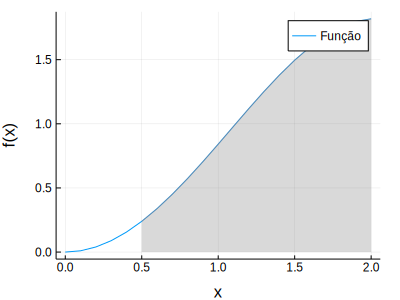

In [71]:
plot(0:0.1:2,  f8, label = "Função", xlabel = "x", ylabel = "f(x)" )
plot!(0.5:0.1:2, f8, fill = (0,:grey), opacity = 0.3, label = "", size = (400, 300))

In [72]:
integrate(f8(x), x, 0.5, 2)

-0.0406342576590166 - 2⋅cos(2) + sin(2)

O resultado da integração é simbólico. Caso seja necessário, podemos transformar o resultado em `float` da seguinte forma:

In [74]:
float(integrate(f8(x), x, 0.5, 2))

1.7009568422609498

** Outra forma de escrever a integral e resolve-la**

In [75]:
integ = Integral(f8(x), (x, 0.5, 2))

 2             
 ⌠             
 ⎮  x⋅sin(x) dx
 ⌡             
0.5            

In [76]:
# resolver a integral
doit(integ)

-0.0406342576590166 - 2⋅cos(2) + sin(2)

In [77]:
float(doit(integ))

1.7009568422609498

### POLINÔMIOS

Realiza a integração dos termos de um polinômio $p$ por termo e opcionalmente adiciona um termo constante $k$. É importante observar que o `SymPy.jl` também importa as funções de manipulação de polinômos `Poly()`, `coeffs()`, `poly()` e `degree()`. Dessa forma, é necessário a sintaxe `Polynomials.função()` quando utilizamos juntos os pacote `Polinomials.jl` e `SymPy.jl`. A função `polyint()` retorna resultado do tipo `Polynomials.Poly{Int64}` manipulável semelhante a uma expressão algébrica simbólia criada pelo `SymPy.jl`.Sintaxe:
```julia
polyint(Polynomials.Poly([a_0, a_1, a_2 ... , a_n], k)
```
Sendo:
* **[a_0, a_1, a_2 ... , a_n]**: vetor dos termos do polinômio;
* **C**: constante de integração.

Exemplo: Calcular a integral do polinômio $p(x) = x^2 - 2 \cdot x$

In [1]:
using Polynomials

In [34]:
dpi = polyint(Polynomials.Poly([-2, 0, 1]))

Poly(-2.0*x + 0.3333333333333333*x^3)

Uma constante $k$ pode ser introduzida ao resultado:

In [37]:
dpi = polyint(Polynomials.Poly([-2, 0, 1]), 1)

Poly(1.0 - 2.0*x + 0.3333333333333333*x^3)

O resultado é manipulável, semelhante a uma expressão algébrica simbólia criada pelo `SymPy.jl` no qual podemos passar um valor.

In [38]:
dpi(0)

1.0

Para atribuir o resultado da função `polyder()` à uma função genérica use:
```julia
@eval função_nome(x) = $(Meta.parse(string(polyint(Polynomials.Poly([a_0, a_1, a_2 ... , a_n])))))
```

In [15]:
@eval fdpi(x) = $(Meta.parse(string(polyint(Polynomials.Poly([-2, 0, 1]), 1))))

fdpi (generic function with 1 method)

In [16]:
fdpi(0)

Poly(1.0)

### INTEGRAL NUMÉRICA

"A integração numérica é necessária quando a integração analítica é difícil, ou mesmo impossível, e quando o integrando é fornecido como um conjunto discreto de pontos" (GILAT; SUBRAMANIAM, 2008).


#### USANDO A FUNÇÃO QUADGK

A função `quadgk()` utiliza a técnica de integração Gauss-Kronrod. O resultado é uma tupla `(valor, erro)`. Sintaxe:
```julia
valor_integral, erro = quadgk(f, a, b, reltol, abstol, maxevals, order)
```
* ** f**: função matemática $f(x)$ expressa como uma expressão algébrica simbólica ou uma função genérica ou anônima;
* ** a, b**: limites de integração função $f$;
* ** reltol**: tolerância do erro relativo (padrão sqrt(eps));
* ** abstol**: tolerância do erro absoluto (padrão 0);
* ** maxevals**:número máximo de avaliações da função (padrão 1e7);
* ** order**: ordem da regra de integração (padrão 7).

obs: Use `quadgk(f, a, b )`. Se executar `quadgk(f(x), a, b )` sem o `SymPy`  carregado ocorre erro. Para instalar o pacote use: 
```julia 
using Pkg
Pkg.add("QuadGK")
```

Exemplo: Calcular a integral $ \displaystyle \int_{0.5}^{2} {sin(x)\cdot x} ~ dx $

In [1]:
f8(x) = sin(x)*x

f8 (generic function with 1 method)

In [2]:
using Plots, QuadGK
gr()

ArgumentError: ArgumentError: Package QuadGK not found in current path:
- Run `import Pkg; Pkg.add("QuadGK")` to install the QuadGK package.


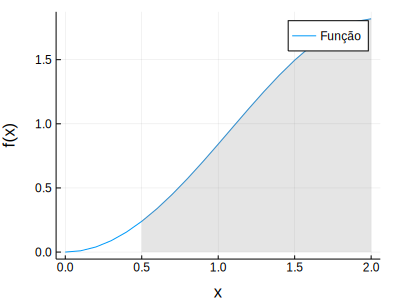

In [6]:
plot(0:0.1:2,  f8, label = "Função", xlabel = "x", ylabel = "f(x)" )
plot!(0.5:0.1:2, f8, fill=(0, :grey), opacity= 0.2, label = "", size = (400, 300))

In [7]:
quadgk(f8, 0.5, 2)

UndefVarError: UndefVarError: quadgk not defined

Utilizando uma função anônima

In [8]:
quadgk(x -> sin(x)*x, 0.5, 2)

UndefVarError: UndefVarError: quadgk not defined

#### USANDO O PACOTE CUBATURE 
é possível utilizar função anônima

Sintaxe:
```julia
valor, erro = hquadrature(f, a_1, b_1 , reltol, abstol, maxevals)
```
* ** f**: função matemática $f(x)$ expressa como uma expressão algébrica simbólica ou uma função genérica ou anônima;
* ** a_1, b_1**: limites de integração função $f$.
* ** reltol**: tolerância do erro relativo (1e-8 padrão);
* ** abstol**: tolerância do erro absoluto (0 padrão);
* ** maxevals**: número máximo de avaliações da função (0 padrão).

O comando hquadrature retorna o valor da integral e o erro (quanto menor, mais preciso é o calculo). Para instalar use: 
```julia 
using Pkg
Pkg.add("HCubature")
```

In [9]:
using HCubature

┌ Info: Precompiling HCubature [19dc6840-f33b-545b-b366-655c7e3ffd49]
└ @ Base loading.jl:1192


In [10]:
f8(x) = sin(x)*x

f8 (generic function with 1 method)

In [11]:
hquadrature(f8, 0.5, 2)

(1.70095684226095, 4.440892098500626e-16)

** Utilizando uma função anônima**

In [12]:
hquadrature(x -> sin(x)*x, 0.5, 2)

(1.70095684226095, 4.440892098500626e-16)

### INTEGRAL IMPRÓPRIA


De acordo com a definição de integral definida, Stewat(2010) informa que temos duas condições que condicionam uma integral imprópria:
1. Quando o intervalo $[a,b]$ é infinito, ou seja,  $~{\displaystyle \int _{a}^{\infty }f(x)\,dx} ~$ , $~{\displaystyle \int _{\infty }^{b}f(x)\,dx}~$ , ${\displaystyle \int _{-\infty}^{\infty }f(x)\,dx}~$
2. Quando ocorre descontinuidade da função para o infinito em um intervalo $[a,b]$.

#### INTEGRAL IMPRÓPRIA SIMBÓLICA

Exemplo 1

$ \displaystyle \int_{-\infty}^{\infty} {1/(1 + x^2)} ~ dx $

In [13]:
using SymPy, Plots
gr()

@syms x

(x,)

In [14]:
f9(x) = 1/(1 + x^2)

f9 (generic function with 1 method)

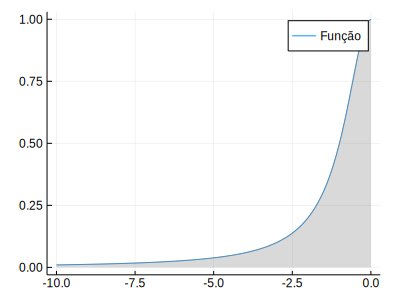

In [15]:
plot(-10:0.1:0, f9, label = ("Função"), size = (400, 300))
plot!(-10:0.1:0, f9, fill=(0,:grey), opacity=0.3, label = "")

In [16]:
integrate(f9(x), x, -oo, 0)

π
─
2

Exemplo 2

$ \displaystyle \int_{-\infty}^{\infty} {f(x)} ~ dx $

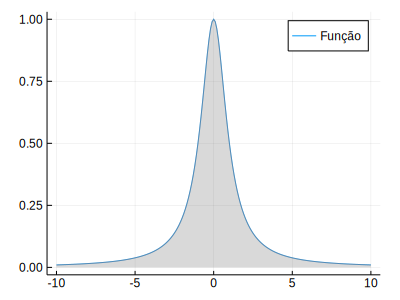

In [17]:
plot(-10:0.1:10, f9, label = ("Função"), size = (400, 300))
plot!(-10:0.1:10, f9, fill=(0,:grey), opacity=0.3, label = "")

In [18]:
integrate(f9(x), x, -oo, +oo)

π

#### INTEGRAL IMPRÓPRIA NUMÉRICA

Para realizar uma integração numérica imprópria, basta utilizar valores grandes ($ 10^{20}$ ou mais ) para os limites que tendem para o infinito positivo; valores pequenos próximo de 0 ($ 10^{-10}$ ou menos) para limites que tendem para zero; valores pequenos ($ - 10^{20}$ ou menos ) para os limites que tendem para o infinito negativo.

In [27]:
using QuadGK

In [28]:
f9(x) = 1/(1 + x^2)

f9 (generic function with 1 method)

In [29]:
# valor e erro
valor , erro = quadgk(f9, 1, 1e20)

(0.7853981633974483, 4.6064467819519415e-11)

In [30]:
# somente o valor 
quadgk(f9, 1, 1e20)[1]

0.7853981633974483

Exemplo: Calcular a integral $ \displaystyle \int_{-\infty}^{\infty} {1/(1 + x^2)} ~ dx~$ entre  $~[-\infty, \infty]$.

 
Para calcular este numericamente esta integral devemos fazer: $ \displaystyle \int_{-\infty}^{\infty} {1/(1 + x^2)} ~ dx = $ $\displaystyle \int_{-\infty}^{0} {1/(1 + x^2)} ~ dx +  \displaystyle \int_{0}^{\infty} {1/(1 + x^2)} ~ dx $ 

In [31]:
quadgk(f9, -1e20, 0)[1] + quadgk(f9, 0, 1e20)[1]

3.1415926535897953

#### USANDO O PACOTE CUBATURE 

Sintaxe:
```julia
hquadrature(f, a, b, reltol, abstol, maxevals)
```
* ** f**: função matemática $f(x)$ expressa como uma expressão algébrica simbólica ou uma função genérica ou anônima;
* ** a, b**: intervalos de integração
* ** reltol**: tolerância do erro relativo (1e-8 padrão);
* ** abstol**: tolerância do erro absoluto (0 padrão);
* ** maxevals**: número máximo de avaliações da função (0 padrão).

O resultado da integração é uma tupla contendo o valor da integral e erro (quanto menor melhor a precisão do valor).

In [32]:
f9(x) = 1/(1 + x^2)

f9 (generic function with 1 method)

In [33]:
using HCubature

In [34]:
# valor e erro
valor , erro = hquadrature(f9, 1, 1e20)

(0.7853981633974483, 4.6064417539666956e-11)

In [35]:
# somente valor
valor

0.7853981633974483

In [36]:
# outra forma de mostrar somente o valor
hquadrature(f9, 1, 1e20)[1]

0.7853981633974483

Exemplo: Calcular a integral $ \displaystyle \int_{-\infty}^{\infty} {1/(1 + x^2)} ~ dx ~$ entre  $~[-\infty, \infty]$

 $ \displaystyle \int_{-\infty}^{\infty} {1/(1 + x^2)} ~ dx = $ $\displaystyle \int_{-\infty}^{0} {1/(1 + x^2)} ~ dx +  \displaystyle \int_{0}^{\infty} {1/(1 + x^2)} ~ dx $ 

In [37]:
hquadrature(f9, -1e20, 0)[1] + hquadrature(f9, 0, 1e20)[1]

3.1415926535897953

### INTEGRAÇÃO MULTIPLA 

#### INTEGRAL DUPLA SIMBÓLICA INDEFINIDA

$\displaystyle \displaystyle \int \int {f(x,y)} ~dxdy $

Sintaxe:
```julia
integrage(integrate(integrate(f(x, y), var_1), var_2)..., var_n)
```
ou
```julia
integrate(f(x, y), (var_1), (var_2), ..., (var_n))
```
Sendo:
* **f(x, y)**: função matemática $f(x, y)$ expressa como uma expressão algébrica simbólica ou uma função genérica;
* **var_1, var_2 ... var_n**: variável da função ou expressão algébrica;

Exemplo: Calcular a integral 
$\displaystyle \displaystyle \int \int {xy - x + y} ~dxdy $

In [38]:
using SymPy
@syms x y

(x, y)

In [39]:
f10(x , y) = x*y - x + y

f10 (generic function with 1 method)

In [40]:
integrate(integrate(f10(x,y), x), y)

   2        ⎛ 2    ⎞
  x ⋅y    2 ⎜x    x⎟
- ──── + y ⋅⎜── + ─⎟
   2        ⎝4    2⎠

Outra forma de utilizar a função `integrate()`:

In [41]:
integrate(f10(x, y), (x), (y))

   2        ⎛ 2    ⎞
  x ⋅y    2 ⎜x    x⎟
- ──── + y ⋅⎜── + ─⎟
   2        ⎝4    2⎠

#### INTEGRAL DUPLA SIMBÓLICA DEFINIDA

$ \displaystyle \int_{a_2}^{b_2} \int_{a_1}^{b_1} {f(x,y)} ~dxdy $

Sintaxe:
```julia
integrate(integrate(f(x, y), var_1, a_1, b_1), var_2, a_2, b_2)
```
ou
```julia
integrate(f(x, y), (var_1, a_1, b_1), (var_2, a_1, b_1))
```
Sendo: 
* **f(x, y)**: função matemática $f(x, y)$ expressa como uma expressão algébrica simbólica ou uma função genérica;
* **var_1, var_2 e var_3**: variáveis de $f(x, y)$;
* **a_1, b_1, a_2, b_2**: limites de integração das variáveis da função/expressão algébrica .

Calcular a integral $ \displaystyle \int_{0}^{1} \int_{0}^{1} {xy - x + y} ~dxdy $

In [42]:
using SymPy
@syms x y

(x, y)

In [43]:
f11(x, y) = x*y - x + y

f11 (generic function with 1 method)

In [44]:
integrate( integrate(f11(x, y), x, 0, 1), y, 0, 1)

1/4

Ou ainda mais prático

In [45]:
integrate(f11(x, y), (x, 0, 1), (y, 0, 1))

1/4

#### INTEGRAL TRIPLA SIMBÓLICA INDEFINIDA

$\displaystyle \int \int \int {f(x,y)} ~dxdydz $

Sintaxe:
```julia
integrate(integrate(integrate(f(x, y), var_1), var_2), var_3)
```
ou
```julia
integrate(f(x, y), (var_1), (var_2), (var_3))
```
Sendo: 
* **f(x, y)**: função matemática $f(x, y)$ expressa como uma expressão algébrica simbólica ou uma função genérica;
* **var_1, var_2 e var_3**: variáveis de $f(x, y)$.

Exemplo: Calcular a integral $\displaystyle \int \int \int {xyz - x + y - z} ~~dxdydz $

In [46]:
using SymPy
@syms x y z

(x, y, z)

In [47]:
f12(x, y, z) = x*y*z - x + y - z

f12 (generic function with 1 method)

In [48]:
int_tripla_a = integrate( integrate( integrate(f12(x, y, z), x), y), z)

   ⎛ 2  2      ⎞     ⎛   2        2⎞
 2 ⎜x ⋅y    x⋅y⎟     ⎜  x ⋅y   x⋅y ⎟
z ⋅⎜───── - ───⎟ + z⋅⎜- ──── + ────⎟
   ⎝  8      2 ⎠     ⎝   2      2  ⎠

In [49]:
# simplificando o resultado
simplify(int_tripla_a)

x⋅y⋅z⋅(-4⋅x + 4⋅y + z⋅(x⋅y - 4))
────────────────────────────────
               8                

Oura forma mais fácil

In [50]:
int_tripla_b = integrate(f12(x, y, z), (x), (y), (z))

   2 ⎛y⋅z   1⎞                2 ⎛y⋅z   1⎞            
- y ⋅⎜─── - ─⎟ - y⋅(y - z) + z ⋅⎜─── - ─⎟ + z⋅(y - z)
     ⎝ 2    2⎠                  ⎝ 2    2⎠            

In [51]:
# simplificando o resultado
simplify(int_tripla_b)

   3      2      3              2
  y ⋅z   y    y⋅z            3⋅z 
- ──── - ── + ──── + 2⋅y⋅z - ────
   2     2     2              2  

#### INTEGRAL TRIPLA SIMBÓLICA DEFINIDA


$\displaystyle \int_{a_3}^{b_3} \int_{a_2}^{b_2} \int_{a_1}^{b_1} f(x,y,z)\, dxdydz$

Sintaxe:
```julia
integrate(integrate(integrate(f(x, y), var_1, a_1, b_1), var_2, a_2, b_2), var_3, a_3, b_3)
```
ou
```julia
integrate(f(x, y), (var_1, a_1, b_1), (var_2, a_2, b_2), (var_3, a_3, b_3)
```
Sendo: 
* **f(x, y)**: função matemática $f(x, y)$ expressa como uma expressão algébrica simbólica ou uma função genérica;
* **var_1, var_2 e var_3**: variáveis de $f(x, y)$;
* **a, b**: limites de integração.

$ \displaystyle \int_{0}^{1} \int_{0}^{1} \int_{{0}}^{{1}} xyz - x + y - z~ dxdydz$

In [52]:
f13(x, y, z) = x*y*z - x + y - z

f13 (generic function with 1 method)

In [53]:
integrate(integrate(integrate(f13(x, y, z), x, 0, 1), y, 0, 1), z, 0, 1)

-3/8

Ou ainda mais prático

In [54]:
integrate(f13(x, y, z), (x, 0, 1), (y, 0, 1),(z, 0, 1))

-3/8

### INTEGRAL MULTIPLA NUMÉRICA

#### INTEGRAL  DUPLA NUMÉRICA
$ \displaystyle \int_{a_2}^{b_2} \int_{a_1}^{b_1} {f(x,y)} ~dxdy $

Vamos utilizar o pacote Cubature. Sintaxe:
```julia
hcubature(f(x), [a_1,a_2], [b_1,b_2],reltol, abstol, maxevals)

```
* ** f(x)**: função, sendo x[1] correspondente à variável "x" x[2] correspondente a variável "y";
* ** [a_1, a_2] e [b_1,b_2]**: intervalos de integração para x[1] e x[2];
* ** reltol**: tolerância do erro relativo (1e-8 padrão);
* ** abstol**: tolerância do erro absoluto (0 padrão);
* ** maxevals**: número máximo de avaliações da função (0 padrão).

O resultado da integração é uma tupla contendo o valor da integral e erro(quanto menor melhor a precisão do valor).

Resolver a integral 

$ \displaystyle \int_{0}^{1} \int_{0}^{1} xy - x + y\, dxdy$

In [55]:
using HCubature

In [56]:
f14(x) = x[1]*x[2] - x[1] + x[2]

f14 (generic function with 1 method)

In [57]:
# valor e erro 
valor, erro = hcubature(f14, [0, 0], [1, 1])

(0.25, 0.0)

In [58]:
# somente valor
valor

0.25

In [59]:
# outra forma
hcubature(f14, [0, 0], [1, 1])[1]

0.25

#### INTEGRAL TRIPLA NUMÉRICA 

$\displaystyle \int_{a_3}^{b_3} \int_{a_2}^{b_2} \int_{a_1}^{b_1} f(x,y,z)\, ~~dxdydzb$

Vamos utilizar o pacote Cubature. Sintaxe:
```julia
[valor_integral,erro]=hcubature(f(x),[a_1,a_2,a_3],[b_1,b_2,b_3],reltol,abstol,maxevals)
```
* ** f(x)**: função, sendo x[1] correspondente à variável "x", x[2] correspondente a variável "y" e x[3] correspondente a variável "z";
* ** [a_1, a_2, a_3] e [b_1, b_2, b_3]**: intervalos de integração para x[1], x[2] e x[3]
* ** reltol**: tolerância do erro relativo (1e-8 padrão);
* ** abstol**: tolerância do erro absoluto (0 padrão);
* ** maxevals**: número máximo de avaliações da função (0 padrão).

O resultado da integração é uma tupla contendo o valor da integral e erro(quanto menor melhor a precisão do valor).

In [60]:
using HCubature

In [61]:
f15(x) = x[1]*x[2]*x[3] - x[1] + x[2] + x[3]

f15 (generic function with 1 method)

In [62]:
# valor e erro
valor , erro = hcubature(f15, [0, 0, 0], [1, 1, 1]) 

(0.6249999999999999, 0.0)

In [63]:
# somente valor 
valor

0.6249999999999999

In [64]:
# Outra forma
hcubature(f15, [0, 0, 0], [1, 1, 1])[1]

0.6249999999999999

## REFERÊNCIA BIBLIOGRÁFICA
STEWART, James. **Cálculo Vol. I**. 3ª reimpressão da 2ª edição de 2010. São Paulo: Pioneira Thomson Learning, 2002. ISBN 978-85221-0666-8. p. 480 a 484

GILAT, Amos Pozo; SUBRAMANIAM, Vish. **Métodos numéricos para engenheiros e cientistas: : uma introdução com aplicações usando o MATLAB**. 1ª edição. Porto Alegre: Bookman, 2008. ISBN 978-85-7780-297-5

DOWNING, Douglas. **Dictionary of mathematics terms**. 3. ed. Hauppauge, N.Y: Barron's, 2009. 410 p. v. 1. 